# Extração de dados do excel

* Copiar as celulas de interesse e fazer paste para ficheiro de texto
* estrutura pressuposta do Excel em termos de colunas, que devem estar na ordem indicada:


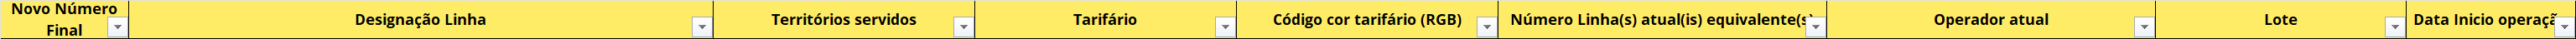

In [2]:
with open('lotes.txt', encoding="utf-8") as f:
    dados = f.readlines()
    
territorios = set()

for linha in dados:
    lista_territorios = linha.split('\t')[2].split(', ')
    for territorio in lista_territorios:
        territorios.add(territorio)

territorios

{'Alcochete',
 'Alentejo Central',
 'Almada',
 'Amadora',
 'Barreiro',
 'Cascais',
 'Lisboa',
 'Loures',
 'Mafra',
 'Moita',
 'Montijo',
 'Odivelas',
 'Oeiras',
 'Oeste',
 'Palmela',
 'Seixal',
 'Sesimbra',
 'Setúbal',
 'Sintra',
 'Vila Franca de Xira'}

# Computação de JSON de municipios

In [5]:
import json

with open('lotes.txt', encoding="utf-8") as f:
    dados = f.readlines()
    
territorios = set()

for linha in dados:
    lista_territorios = linha.split('\t')[2].split(', ')
    for territorio in lista_territorios:
        territorios.add(territorio)

diretorio = { t:{} for t in territorios }

for linha in dados:
    lista_territorios = linha.split('\t')[2].split(', ')
    for territorio in lista_territorios:
        if linha.split('\t')[4] not in diretorio[territorio]: 
            diretorio[territorio][linha.split('\t')[4]] = [(linha.split('\t')[0], linha.split('\t')[1])]
        else:
            diretorio[territorio][linha.split('\t')[4]] += [(linha.split('\t')[0], linha.split('\t')[1])]

diretorio

f = open('diretorio.json', 'w')
json.dump(diretorio, f, indent=4, sort_keys=True)
f.close()

In [19]:
for territorio,antigas in diretorio.items():
    if '1' in antigas.keys():
        print (territorio, antigas['1'])


Oeiras [('1101', 'Alfragide (Alegro) - Algés (Terminal)'), ('1504', 'Algés (Terminal) - Bairro Zambujal, via Linda-a-Velha'), ('1722', 'Alfragide (Alegro) - Hospital São Francisco Xavier')]
Lisboa [('1722', 'Alfragide (Alegro) - Hospital São Francisco Xavier')]
Amadora [('1504', 'Algés (Terminal) - Bairro Zambujal, via Linda-a-Velha')]


# Computação de JSON de operadores

In [1]:
import json

with open('lotes_operadores.txt', encoding="utf-8") as f:
    dados = f.readlines()
    
print(dados[0])

territorios = set()

for linha in dados:
    lista_territorios = linha.split('\t')[2].split(', ')
    for territorio in lista_territorios:
        territorios.add(territorio)

diretorio = { t:{} for t in territorios }

for linha in dados:
    lista_territorios = linha.split('\t')[2].split(', ')
    for territorio in lista_territorios:
        if linha.split('\t')[4] not in diretorio[territorio]: 
            diretorio[territorio][linha.split('\t')[4]] = [(linha.split('\t')[0], linha.split('\t')[1])]
        else:
            diretorio[territorio][linha.split('\t')[4]] += [(linha.split('\t')[0], linha.split('\t')[1])]

f = open('diretorio_operadores.json', 'w')
json.dump(diretorio, f, indent=4, sort_keys=True)
f.close()

1001	Alfragide (Estrada do Seminario) - Reboleira (Estação)	Nova	Urbana	Nova	Lote 1 - Noroeste	01/07/2022



# Criar HTML para diretório

In [21]:
html = ''

html = """    <div>
        Municipio:
        <select id="municipio" name="municipios">
            <option value="nada">-</option>\n"""

for municipio in sorted(diretorio.keys()):
    html += f'            <option value="{municipio}">{municipio}</option>\n'

html += """        </select>
    </div>\n\n"""


print(html)

    <div>
        Municipio:
        <select id="municipio" name="municipios">
            <option value="nada">-</option>
            <option value="Alcochete">Alcochete</option>
            <option value="Alentejo Central">Alentejo Central</option>
            <option value="Almada">Almada</option>
            <option value="Amadora">Amadora</option>
            <option value="Barreiro">Barreiro</option>
            <option value="Cascais">Cascais</option>
            <option value="Lisboa">Lisboa</option>
            <option value="Loures">Loures</option>
            <option value="Mafra">Mafra</option>
            <option value="Moita">Moita</option>
            <option value="Montijo">Montijo</option>
            <option value="Odivelas">Odivelas</option>
            <option value="Oeiras">Oeiras</option>
            <option value="Oeste">Oeste</option>
            <option value="Palmela">Palmela</option>
            <option value="Seixal">Seixal</option>
            <option value

In [137]:
html = """    <div class="municipios">
        Municípios:
        <select id="territorio" name="territorio">
            <option value="nada">-</option>\n"""

for territorio in sorted(diretorio.keys()):
    html += f'            <option value="{territorio}">{territorio}</option>\n'

html += """        </select>
    </div>\n\n<div class="antigas">\n"""


for territorio,carreiras in sorted(diretorio.items()):
    html += f'    <div class="carreira-div" id="{territorio}-div">\n'
    html += f'        Linha antiga:\n'
    html += f'        <select class="carreira" id="{territorio}" onchange="mostraNova(' + f"'{territorio}'" +')">\n'
    html += f'            <option value="nada">-</option>\n'
    
    for antiga, novas  in sorted(carreiras.items()):
        
        if antiga != "Nova":
            h = "<ul>"
            for item in novas:
                h += f"<li><b>{item[0]}</b>:{item[1]}</li>"
            h += "</ul>"        

            html += f'            <option value="{h}">{antiga}</option>\n' 

    html += """         </select>
    </div>\n\n"""
    
    
html += "  </div>"

In [22]:
html = ''

html = """    <div class="municipios">
        Municípios:
        <select id="territorio" name="territorio">
            <option value="nada">-</option>\n"""

for territorio in sorted(diretorio.keys()):
    html += f'            <option value="{territorio}">{territorio}</option>\n'

html += """        </select>
    </div>\n\n<div class="antigas">\n"""


for territorio,carreiras in sorted(diretorio.items()):
    html += f'    <div class="carreira-div" id="{territorio}-div">\n'
    html += f'        Linha antiga:\n'
    html += f'        <select class="carreira" id="{territorio}" onchange="mostraNova(' + f"'{territorio}'" +')">\n'
    html += f'            <option value="nada">-</option>\n'
    
    novas_linhas = []
    for antiga, novas  in sorted(carreiras.items()):
        
        if antiga == "Nova":
            novas_linhas += [novas]
        else:
            h = "<ul>"
            for item in novas:
                h += f"<li><b>{item[0]}</b>:{item[1]}</li>"
            h += "</ul>"        

            html += f'            <option value="{h}">{antiga}</option>\n' 

    html += """         </select>
    
    
     """
    
    h = "<ul>"
    for linha in novas_linhas:
        for l in linha:
            h += f"<li><b>{l[0]}</b>: {l[1]}</li>"
    h += "</ul>"  
        
    
    html += f"<br><br><details><summary>Linhas novas</summary><div>{h}</div></details>" 
    
    
    
    
    html += """
    
    </div>\n\n"""

    
html += "  </div>"

In [23]:
print(html)

    <div class="municipios">
        Municípios:
        <select id="territorio" name="territorio">
            <option value="nada">-</option>
            <option value="Alcochete">Alcochete</option>
            <option value="Alentejo Central">Alentejo Central</option>
            <option value="Almada">Almada</option>
            <option value="Amadora">Amadora</option>
            <option value="Barreiro">Barreiro</option>
            <option value="Cascais">Cascais</option>
            <option value="Lisboa">Lisboa</option>
            <option value="Loures">Loures</option>
            <option value="Mafra">Mafra</option>
            <option value="Moita">Moita</option>
            <option value="Montijo">Montijo</option>
            <option value="Odivelas">Odivelas</option>
            <option value="Oeiras">Oeiras</option>
            <option value="Oeste">Oeste</option>
            <option value="Palmela">Palmela</option>
            <option value="Seixal">Seixal</option>
    

In [104]:
novas = [('1530', 'Oeiras (Estação) - Queluz'), ('1601', 'Amadora Este (Metro) - Carcavelos (Praia)'), ('1602', 'Carcavelos (Praia) - Queluz')]

h = "<ul>\n"
for item in novas:
    h += f"   <li><b>{item[0]}</b>: {item[1]}</li>\n"
h += "</ul>\n"
    
print(h)

<ul>
   <li><b>1530<b>: Oeiras (Estação) - Queluz</li>
   <li><b>1601<b>: Amadora Este (Metro) - Carcavelos (Praia)</li>
   <li><b>1602<b>: Carcavelos (Praia) - Queluz</li>
</ul>

